In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def generate_linear(n=100):
    pts=np.random.uniform(0,1,(n,2))
    inputs=[]
    labels=[]
    for pt in pts:
        inputs.append([pt[0],pt[1]])
        distance=(pt[0]-pt[1])/1.414
        if pt[0] > pt[1]:
            labels.append(0)
        else:
            labels.append(1)
    return np.array(inputs) , np.array(labels).reshape(n,1)

def generate_XOR_easy():
    inputs=[]
    labels=[]
    
    for i in range(11):
        inputs.append([0.1*i,0.1*i])
        labels.append(0)
        if(0.1*i==0.5):
            continue
        inputs.append([0.1*i,1-0.1*i])
        labels.append(1)
    return np.array(inputs) , np.array(labels).reshape(21,1)

def show_result(x,y,pred_y):
    plt.subplot(1,2,1)
    plt.title('Ground truth',fontsize=18)
    for i in range(x.shape[0]):
        if(y[i]==0):
            plt.plot(x[i][0],x[i][1],'ro')
        else:
            plt.plot(x[i][0],x[i][1],'bo')
    plt.subplot(1,2,2)
    plt.title('Predict result',fontsize=18)
    for i in range(x.shape[0]):
        if(pred_y[i]==0):
            plt.plot(x[i][0],x[i][1],'ro')
        else:
            plt.plot(x[i][0],x[i][1],'bo')
    plt.show()
    
def sigmoid(x):
    return 1.0/(1.0+np.exp(-x))

def derivative_sigmoid(x):
    return np.multiply(x,1.0-x)

In [13]:
class Network():
    def __init__(self,inputShape=2,outputShape=1,hiddenLayer=2,hiddenShape=[10,10],lr=0.05,bias=True):
        self.inputShape=inputShape
        self.outputShape=outputShape
        self.hiddenLayer=hiddenLayer
        self.hiddenShape=hiddenShape
        self.lr=lr
        self.weight,self.biasWeight=self.initWeight()
        
        if bias==True:
            self.bias=np.ones(1+hiddenLayer)
        else:
            self.bias=np.zeros(1+hiddenLayer)
        
        
    def initWeight(self):
        layers=2+self.hiddenLayer
        weight=[]
        biasWeight=[]
        lastLayer=self.inputShape
        for i in range(self.hiddenLayer):
            weight.append(np.random.randn(lastLayer,self.hiddenShape[i]))
            biasWeight.append(np.random.randn(self.hiddenShape[i]))

            lastLayer=self.hiddenShape[i]
        weight.append(np.random.randn(lastLayer,self.outputShape))
        biasWeight.append(np.random.randn(self.outputShape))
       
        return weight , biasWeight
     
    def forward(self,x):
        self.y=[]
        _x=x
        self.y.append(_x)
        for i in range(len(self.weight)):
            if(_x.shape[-1]!=self.weight[i].shape[0]):
                print("In layer %d , dim %d and dim %d does not match" %(i,_x.shape[-1],self.weight[i].shape[0]))
            _x=sigmoid(_x@self.weight[i]+self.bias[i]*self.biasWeight[i])
            self.y.append(_x)
        return np.array(self.y)
    
    def backward(self,loss): 
        delta=(loss)*derivative_sigmoid(self.y[-1])
        for i in range(1,len(self.weight)+1):
            tmp=delta.copy()
            delta=(delta@self.weight[-i].transpose())*derivative_sigmoid(self.y[-i-1])
            self.weight[-i]=self.weight[-i]-self.lr*(self.y[-i-1].reshape(-1,1)@tmp.reshape(1,-1))
            self.biasWeight[-i]=self.biasWeight[-i]-self.lr*tmp

            

In [17]:
inputs,labels=generate_linear()
model=Network(hiddenShape=[20,20],lr=0.05,bias=False)
epoch=2000

for i in range(epoch):
    loss=0
    for j in range(inputs.shape[0]):
        x=np.array(inputs[j])
        y=np.array(labels[j])
        _y=model.forward(x)
        model.backward(_y[-1]-y)
        loss+=np.abs(_y[-1]-y)
    print(loss)

[51.14755991]
[48.73321031]
[46.58850622]
[44.66410068]
[42.95696289]
[41.42932751]
[40.03444659]
[38.73576524]
[37.5099799]
[36.34374681]
[35.22983964]
[34.16436958]
[33.14508679]
[32.17043783]
[31.23908387]
[30.34967971]
[29.50079176]
[28.69088519]
[27.91834225]
[27.18149141]
[26.4786376]
[25.80808908]
[25.16817937]
[24.55728407]
[23.97383324]
[23.41631986]
[22.88330527]
[22.37342222]
[21.88537602]
[21.41794436]
[20.96997613]
[20.54038946]
[20.12816923]
[19.73236432]
[19.35208447]
[18.98649715]
[18.63482428]
[18.29633893]
[17.97036212]
[17.65625963]
[17.3534389]
[17.06134606]
[16.77946308]
[16.50730506]
[16.24441767]
[15.99037474]
[15.744776]
[15.50724499]
[15.27742716]
[15.05498803]
[14.83961163]
[14.63099898]
[14.42886681]
[14.23294627]
[14.04298193]
[13.85873077]
[13.67996134]
[13.50645294]
[13.33799502]
[13.17438648]
[13.01543518]
[12.86095743]
[12.71077754]
[12.56472745]
[12.42264635]
[12.28438035]
[12.14978215]
[12.01871081]
[11.89103145]
[11.76661497]
[11.64533787]
[11.5270819

[2.33616806]
[2.33331097]
[2.33046094]
[2.32761794]
[2.32478194]
[2.32195292]
[2.31913084]
[2.31631569]
[2.31350742]
[2.31070602]
[2.30791146]
[2.30512371]
[2.30234275]
[2.29956855]
[2.29680107]
[2.29404031]
[2.29128622]
[2.28853879]
[2.28579799]
[2.2830638]
[2.28033618]
[2.27761511]
[2.27490058]
[2.27219254]
[2.26949099]
[2.26679588]
[2.26410721]
[2.26142494]
[2.25874905]
[2.25607952]
[2.25341632]
[2.25075943]
[2.24810882]
[2.24546447]
[2.24282636]
[2.24019447]
[2.23756876]
[2.23494922]
[2.23233583]
[2.22972856]
[2.22712739]
[2.2245323]
[2.22194326]
[2.21936025]
[2.21678325]
[2.21421224]
[2.21164719]
[2.20908809]
[2.20653491]
[2.20398763]
[2.20144622]
[2.19891068]
[2.19638097]
[2.19385707]
[2.19133897]
[2.18882664]
[2.18632007]
[2.18381922]
[2.18132408]
[2.17883464]
[2.17635086]
[2.17387273]
[2.17140023]
[2.16893334]
[2.16647204]
[2.1640163]
[2.16156612]
[2.15912146]
[2.15668232]
[2.15424866]
[2.15182048]
[2.14939774]
[2.14698044]
[2.14456855]
[2.14216206]
[2.13976094]
[2.13736518]
[2

[1.31020533]
[1.30929648]
[1.30838889]
[1.30748256]
[1.30657749]
[1.30567367]
[1.30477111]
[1.30386979]
[1.30296973]
[1.30207091]
[1.30117333]
[1.30027699]
[1.29938189]
[1.29848802]
[1.29759539]
[1.29670399]
[1.29581381]
[1.29492486]
[1.29403714]
[1.29315063]
[1.29226534]
[1.29138127]
[1.29049841]
[1.28961677]
[1.28873633]
[1.2878571]
[1.28697907]
[1.28610224]
[1.28522661]
[1.28435218]
[1.28347894]
[1.2826069]
[1.28173604]
[1.28086637]
[1.27999789]
[1.27913059]
[1.27826447]
[1.27739953]
[1.27653576]
[1.27567317]
[1.27481174]
[1.27395149]
[1.2730924]
[1.27223448]
[1.27137772]
[1.27052212]
[1.26966768]
[1.26881439]
[1.26796225]
[1.26711127]
[1.26626143]
[1.26541274]
[1.2645652]
[1.26371879]
[1.26287353]
[1.2620294]
[1.26118641]
[1.26034455]
[1.25950382]
[1.25866422]
[1.25782575]
[1.2569884]
[1.25615217]
[1.25531707]
[1.25448308]
[1.25365021]
[1.25281845]
[1.2519878]
[1.25115826]
[1.25032982]
[1.2495025]
[1.24867627]
[1.24785115]
[1.24702712]
[1.24620419]
[1.24538236]
[1.24456162]
[1.2437

[0.90967853]
[0.90924905]
[0.90882]
[0.90839138]
[0.90796318]
[0.90753541]
[0.90710806]
[0.90668114]
[0.90625464]
[0.90582857]
[0.90540292]
[0.90497769]
[0.90455289]
[0.9041285]
[0.90370454]
[0.90328099]
[0.90285787]
[0.90243516]
[0.90201287]
[0.901591]
[0.90116954]
[0.90074851]
[0.90032788]
[0.89990768]
[0.89948788]
[0.89906851]
[0.89864954]
[0.89823099]
[0.89781285]
[0.89739512]
[0.8969778]
[0.89656089]
[0.89614439]
[0.8957283]
[0.89531262]
[0.89489735]
[0.89448249]
[0.89406803]
[0.89365398]
[0.89324033]
[0.89282709]
[0.89241425]
[0.89200182]
[0.89158979]
[0.89117817]
[0.89076694]
[0.89035612]
[0.8899457]
[0.88953568]
[0.88912606]
[0.88871684]
[0.88830801]
[0.88789959]
[0.88749156]
[0.88708393]
[0.8866767]
[0.88626987]
[0.88586342]
[0.88545738]
[0.88505173]
[0.88464647]
[0.8842416]
[0.88383713]
[0.88343305]
[0.88302936]
[0.88262606]
[0.88222316]
[0.88182064]
[0.88141851]
[0.88101677]
[0.88061542]
[0.88021446]
[0.87981388]
[0.87941369]
[0.87901389]
[0.87861447]
[0.87821544]
[0.8778167

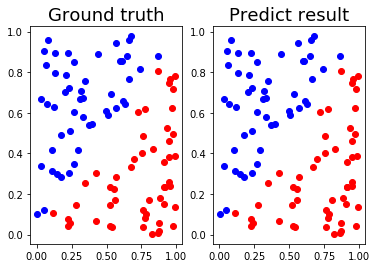

In [18]:
ans=[]
for j in range(inputs.shape[0]):
    x=np.array(inputs[j])
    _y=model.forward(x)
    ans.append(_y[-1])

ans=np.array(ans)
for i in range(len(ans)):
    if ans[i]>=0.5:
        ans[i]=1
    else:
        ans[i]=0
show_result(inputs,labels,ans)

In [19]:
inputs,labels=generate_XOR_easy()
model=Network(hiddenShape=[20,20],lr=0.05,bias=False)
epoch=2000

for i in range(epoch):
    loss=0
    for j in range(inputs.shape[0]):
        x=np.array(inputs[j])
        y=np.array(labels[j])
        _y=model.forward(x)
        model.backward(_y[-1]-y)
        loss+=np.abs(_y[-1]-y)
    print(loss)

[10.06850267]
[10.10522404]
[10.19289713]
[10.3812891]
[10.58318174]
[10.68590686]
[10.72417622]
[10.73707917]
[10.74049923]
[10.74031422]
[10.73874247]
[10.73663594]
[10.73432451]
[10.7319363]
[10.72952106]
[10.72709807]
[10.72467474]
[10.72225384]
[10.71983638]
[10.71742263]
[10.71501264]
[10.71260631]
[10.71020354]
[10.7078042]
[10.70540817]
[10.70301531]
[10.70062551]
[10.69823865]
[10.69585461]
[10.69347329]
[10.69109458]
[10.68871837]
[10.68634458]
[10.6839731]
[10.68160385]
[10.67923673]
[10.67687166]
[10.67450856]
[10.67214736]
[10.66978797]
[10.66743032]
[10.66507434]
[10.66271996]
[10.66036711]
[10.65801574]
[10.65566577]
[10.65331714]
[10.6509698]
[10.64862369]
[10.64627874]
[10.64393491]
[10.64159213]
[10.63925035]
[10.63690952]
[10.63456959]
[10.63223049]
[10.62989217]
[10.62755459]
[10.62521769]
[10.62288141]
[10.62054571]
[10.61821052]
[10.61587579]
[10.61354147]
[10.61120749]
[10.60887381]
[10.60654036]
[10.60420709]
[10.60187393]
[10.59954082]
[10.5972077]
[10.5948745]

[5.8063549]
[5.79789459]
[5.78945674]
[5.78104131]
[5.77264825]
[5.76427753]
[5.75592907]
[5.74760285]
[5.7392988]
[5.73101688]
[5.72275704]
[5.71451923]
[5.7063034]
[5.69810949]
[5.68993746]
[5.68178725]
[5.67365882]
[5.6655521]
[5.65746706]
[5.64940362]
[5.64136175]
[5.6333414]
[5.62534249]
[5.61736499]
[5.60940884]
[5.60147399]
[5.59356037]
[5.58566795]
[5.57779665]
[5.56994644]
[5.56211724]
[5.55430902]
[5.54652171]
[5.53875525]
[5.5310096]
[5.5232847]
[5.51558049]
[5.50789691]
[5.50023392]
[5.49259144]
[5.48496944]
[5.47736785]
[5.46978661]
[5.46222567]
[5.45468497]
[5.44716446]
[5.43966408]
[5.43218378]
[5.42472348]
[5.41728315]
[5.40986272]
[5.40246214]
[5.39508134]
[5.38772027]
[5.38037888]
[5.37305711]
[5.3657549]
[5.35847219]
[5.35120892]
[5.34396505]
[5.3367405]
[5.32953523]
[5.32234918]
[5.31518229]
[5.30803449]
[5.30090575]
[5.29379599]
[5.28670516]
[5.27963321]
[5.27258008]
[5.2655457]
[5.25853002]
[5.25153299]
[5.24455455]
[5.23759464]
[5.2306532]
[5.22373018]
[5.2168255

[2.82214772]
[2.81971724]
[2.81728914]
[2.81486341]
[2.81244006]
[2.81001907]
[2.80760045]
[2.8051842]
[2.8027703]
[2.80035877]
[2.7979496]
[2.79554278]
[2.79313832]
[2.79073621]
[2.78833645]
[2.78593904]
[2.78354398]
[2.78115126]
[2.77876088]
[2.77637284]
[2.77398714]
[2.77160378]
[2.76922275]
[2.76684406]
[2.7644677]
[2.76209367]
[2.75972196]
[2.75735258]
[2.75498552]
[2.75262079]
[2.75025838]
[2.74789829]
[2.74554051]
[2.74318505]
[2.74083191]
[2.73848107]
[2.73613255]
[2.73378634]
[2.73144243]
[2.72910083]
[2.72676154]
[2.72442455]
[2.72208986]
[2.71975747]
[2.71742738]
[2.71509959]
[2.71277409]
[2.71045089]
[2.70812998]
[2.70581136]
[2.70349504]
[2.701181]
[2.69886925]
[2.69655978]
[2.6942526]
[2.69194771]
[2.6896451]
[2.68734476]
[2.68504671]
[2.68275094]
[2.68045744]
[2.67816622]
[2.67587727]
[2.6735906]
[2.6713062]
[2.66902407]
[2.66674421]
[2.66446662]
[2.6621913]
[2.65991824]
[2.65764745]
[2.65537893]
[2.65311266]
[2.65084866]
[2.64858692]
[2.64632744]
[2.64407022]
[2.6418152

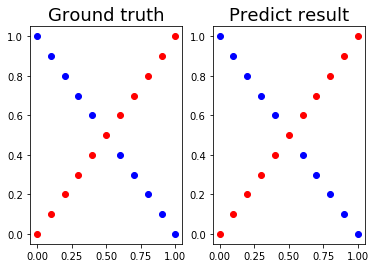

In [20]:
ans=[]
for j in range(inputs.shape[0]):
    x=np.array(inputs[j])
    _y=model.forward(x)
    ans.append(_y[-1])

ans=np.array(ans)
for i in range(len(ans)):
    if ans[i]>=0.5:
        ans[i]=1
    else:
        ans[i]=0
show_result(inputs,labels,ans)